### Setup phase

In [1]:
# Importing numpy and pandas libraries.
import pandas as pd
import numpy as np

In [2]:
# Reading the csv file, index_col = "DATE" to use date as index column.
rawdata = pd.read_csv("/Users/omertopcu/Documents/Data_Science/Projects/Python/Weather_Forecast_Barcelona_Jan2023/Barcelona_Weather_data.csv",index_col="DATE")

In [3]:
# Overview of the data
rawdata.info()
# PRCP: Precipitation (mm)
# SWWD: Snow depth (mm)
# TAVG: Average temperature(C)
# TMAX: Maximum temperature(C)
# TMIN: Minimum temprerature(C)


<class 'pandas.core.frame.DataFrame'>
Index: 45309 entries, 2008-04-18 to 2014-01-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  45309 non-null  object 
 1   NAME     45309 non-null  object 
 2   PRCP     45229 non-null  float64
 3   SNWD     2 non-null      float64
 4   TAVG     18269 non-null  float64
 5   TMAX     45182 non-null  float64
 6   TMIN     29007 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [4]:
# Cleaning the NAME column.
rawdata.NAME = rawdata.NAME.str.replace(',', '').str.replace(' ','_')

In [5]:
# Seperating raw data by station name.
grouped = rawdata.groupby("NAME")

stations = {}
for name in rawdata["NAME"].unique():
    stations[name] = grouped.get_group(name)

In [6]:
# Overview of the grouped dataframes.
for key in stations:
    print (key,stations[key].shape)

BARCELONA_ZONA_UNIVERSITARIA_SP (4861, 7)
BARCELONA_EL_RAVAL_SP (4969, 7)
BARCELONA_AEROPUERTO_SP (19377, 7)
BARCELONA_FABRA_OBSERVATORY_SP (16102, 7)


In [7]:
# Overview of the null percentages of the grouped dataframes.

station_nulls={}
for x,y in stations.items():
    null_pct= y.apply(pd.isnull).sum()/y.shape[0]
    station_nulls[x]=null_pct
    print (x,'\n', station_nulls[x])

BARCELONA_ZONA_UNIVERSITARIA_SP 
 STATION    0.000000
NAME       0.000000
PRCP       0.000206
SNWD       1.000000
TAVG       1.000000
TMAX       0.000823
TMIN       0.000411
dtype: float64
BARCELONA_EL_RAVAL_SP 
 STATION    0.0
NAME       0.0
PRCP       0.0
SNWD       1.0
TAVG       1.0
TMAX       0.0
TMIN       0.0
dtype: float64
BARCELONA_AEROPUERTO_SP 
 STATION    0.000000
NAME       0.000000
PRCP       0.004077
SNWD       0.999897
TAVG       0.057181
TMAX       0.006348
TMIN       0.010218
dtype: float64
BARCELONA_FABRA_OBSERVATORY_SP 
 STATION    0.0
NAME       0.0
PRCP       0.0
SNWD       1.0
TAVG       1.0
TMAX       0.0
TMIN       1.0
dtype: float64


In [8]:
# Looking at the quantity (number of rows) and quality ( null percentage) of the data from different stations,
# I choose to progress with BARCELONA_AEROPUERTO_SP data only with columns starting from\
# PRCP as station code, name and avg temperature is not needed.

barcelona_weather= stations['BARCELONA_AEROPUERTO_SP'].loc[:, ['PRCP','SNWD','TMAX','TMIN']].copy()
barcelona_weather

,PRCP,SNWD,TMAX,TMIN
DATE,,,,
1970-01-01,0.0,NaN,10.6,1.6
1970-01-02,0.2,NaN,7.8,1.4
1970-01-03,4.4,NaN,6.6,0.6
1970-01-04,4.7,NaN,12.4,6.0
1970-01-05,0.0,NaN,16.4,8.8
...,...,...,...,...
2023-01-15,NaN,NaN,NaN,NaN
2023-01-16,1.0,NaN,NaN,NaN
2023-01-17,0.0,NaN,NaN,NaN


In [9]:
# I am saving data from different stations in seperate csv files in case I want to work\
# with them in future.
# Using pathlib library.

from pathlib import Path
for x,y in stations.items():
# using lower to save the filename in lowercase.
    name=x.lower()
    filepath = Path(f'/Users/omertopcu/Documents/Data_Science/Projects/Python/Weather_Forecast_Barcelona_Jan2023/data_grouped/{name}.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    y.to_csv(filepath)

### Narrowing the analysis to the most appropriate dataset

In [10]:
barcelona_weather

,PRCP,SNWD,TMAX,TMIN
DATE,,,,
1970-01-01,0.0,NaN,10.6,1.6
1970-01-02,0.2,NaN,7.8,1.4
1970-01-03,4.4,NaN,6.6,0.6
1970-01-04,4.7,NaN,12.4,6.0
1970-01-05,0.0,NaN,16.4,8.8
...,...,...,...,...
2023-01-15,NaN,NaN,NaN,NaN
2023-01-16,1.0,NaN,NaN,NaN
2023-01-17,0.0,NaN,NaN,NaN


### Data Cleansing

In [11]:
# Renaming the columns for clarity
barcelona_weather.columns=['precip','snow_depth','temp_max','temp_min']

In [12]:
# Inspecting the snow depth column
print( barcelona_weather['snow_depth'].value_counts() )
# Only two values in whole dataset
print( barcelona_weather[ barcelona_weather['snow_depth']==20.0] )
print( barcelona_weather[ barcelona_weather['snow_depth']==841.0] )

# Looking closely at the data, we can see that value of 840 mm of snow depth in October\
# is an erroneous value. The one from February seems to be correct.
# Only one correct value for snow depth in whole dataset is not valuable to the analysis.
# This is probably due to snow being rare in Barcelona.

# Deleting the snow_depth column
del barcelona_weather['snow_depth']



20.0     1
841.0    1
Name: snow_depth, dtype: int64
            precip  snow_depth  temp_max  temp_min
DATE                                              
1983-02-11     0.0        20.0       7.0      -2.4
            precip  snow_depth  temp_max  temp_min
DATE                                              
1983-10-11     0.0       841.0      24.4      17.6


In [13]:
# Inspecting the datatypes
barcelona_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [14]:
# Changing index column datatype to datetime.
print( barcelona_weather.index )

barcelona_weather.index = pd.to_datetime(barcelona_weather.index)
print( barcelona_weather.index )

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14',
       '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-21', '2023-01-23'],
      dtype='object', name='DATE', length=19377)
DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-21', '2023-01-23'],
              dtype='datetime64[ns]', name='DATE', length=19377, freq=None)


In [15]:
# A lot of null values towards the bottom of the dataset
barcelona_weather.tail(90)


,precip,temp_max,temp_min
DATE,,,
2022-10-22,0.0,26.6,18.1
2022-10-23,0.0,26.2,18.7
2022-10-24,0.0,27.0,18.7
2022-10-25,0.0,26.8,17.9
2022-10-26,0.0,26.3,18.0
...,...,...,...
2023-01-15,NaN,NaN,NaN
2023-01-16,1.0,NaN,NaN
2023-01-17,0.0,NaN,NaN


In [16]:
# Frequent occuerance of null values start from November 2022, therefore we will remove\
# the values starting from November 2022

barcelona_weather.iloc[-90:-60]

barcelona_weather = barcelona_weather.loc[:'2022-10-31'].copy()
barcelona_weather

,precip,temp_max,temp_min
DATE,,,
1970-01-01,0.0,10.6,1.6
1970-01-02,0.2,7.8,1.4
1970-01-03,4.4,6.6,0.6
1970-01-04,4.7,12.4,6.0
1970-01-05,0.0,16.4,8.8
...,...,...,...
2022-10-27,0.0,22.7,16.8
2022-10-28,0.0,22.9,15.9
2022-10-29,0.0,22.1,14.5


In [17]:
# Inspecting the precipitation column null values
barcelona_weather[pd.isnull(barcelona_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
2009-12-09,NaN,17.0,6.4
2009-12-10,NaN,18.9,7.4
2009-12-13,NaN,8.2,4.9
2009-12-17,NaN,6.1,1.7
2009-12-18,NaN,8.7,-0.3
2010-01-02,NaN,11.3,5.1
2010-01-05,NaN,11.0,8.3
2010-01-14,NaN,14.1,6.4
2010-01-18,NaN,11.4,8.6


In [18]:
# Days with no precipitation at all is almost 80% of all days in the dataset.
print( barcelona_weather['precip'].value_counts()[0] / barcelona_weather.shape[0] )
# Therefore I will fill NaN values in precip column with 0.
barcelona_weather['precip']=barcelona_weather['precip'].fillna(0)


0.7985179043374618


In [19]:
# Inspecting null values in the temperature columns.
print( barcelona_weather[pd.isnull(barcelona_weather['temp_max'])] )
print( barcelona_weather[pd.isnull(barcelona_weather['temp_min'])] )

            precip  temp_max  temp_min
DATE                                  
2005-09-06     3.3       NaN       NaN
2005-12-22     0.0       NaN       NaN
2006-06-27     0.0       NaN       NaN
2010-08-13    39.3       NaN       NaN
2010-10-07     0.0       NaN       NaN
2010-10-13     0.0       NaN       NaN
2010-11-07     0.0       NaN       NaN
2010-11-24     0.0       NaN       NaN
2010-12-04     0.0       NaN       NaN
2011-04-08     0.0       NaN       NaN
2011-05-04     0.0       NaN       NaN
2011-11-04    14.1       NaN       NaN
2011-11-08     0.0       NaN       NaN
2012-03-09     0.0       NaN       NaN
2012-04-02     0.0       NaN       NaN
2013-05-23     0.1       NaN       NaN
2014-11-07     0.0       NaN       NaN
2014-11-08     0.0       NaN       NaN
2014-11-12     0.0       NaN       NaN
2014-11-25     0.0       NaN       NaN
2015-03-27     0.0       NaN       NaN
2015-05-20    18.1       NaN       NaN
2015-06-03     0.0       NaN       NaN
2015-06-28     0.0       

In [20]:
# Forward filling all of the null values.
barcelona_weather = barcelona_weather.fillna(method = 'ffill')

In [21]:
# Making sure we have no null values left.
barcelona_weather.apply(pd.isnull).sum()/barcelona_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [22]:
# In the documentation of the data it says that 9999 values indicate missing data.
# Checking if there is any 9999 value.
barcelona_weather.apply(lambda x : (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [23]:
# Checking if we any data with temp_max = 0
# These rows are erroneous data, because all columns are equal to 0.0
# It is impossible to have temp_max =temp_min on any day
barcelona_weather[barcelona_weather['temp_max'] == 0.0]

,precip,temp_max,temp_min
DATE,,,
1970-11-29,0.0,0.0,0.0
1972-10-11,0.0,0.0,0.0
1986-10-28,0.0,0.0,0.0
1992-01-31,0.0,0.0,0.0


In [24]:
# Replacing the values in these rows with null values to later forward fill them.
err_dates = ['1970-11-29','1972-10-11', '1986-10-28', '1992-01-31']
for date in err_dates:
    barcelona_weather.loc[date] = np.nan
    print(barcelona_weather.loc[date])

precip     NaN
temp_max   NaN
temp_min   NaN
Name: 1970-11-29 00:00:00, dtype: float64
precip     NaN
temp_max   NaN
temp_min   NaN
Name: 1972-10-11 00:00:00, dtype: float64
precip     NaN
temp_max   NaN
temp_min   NaN
Name: 1986-10-28 00:00:00, dtype: float64
precip     NaN
temp_max   NaN
temp_min   NaN
Name: 1992-01-31 00:00:00, dtype: float64


In [25]:
# Forward filling these 4 rows.
barcelona_weather = barcelona_weather.fillna(method = 'ffill')

In [26]:
# Confirming that we sucessfully forward filled these dates.
for date in err_dates:
    print(barcelona_weather.loc[date])

precip       0.0
temp_max    18.6
temp_min    10.4
Name: 1970-11-29 00:00:00, dtype: float64
precip       0.0
temp_max    20.4
temp_min    14.0
Name: 1972-10-11 00:00:00, dtype: float64
precip       0.0
temp_max    19.5
temp_min    10.0
Name: 1986-10-28 00:00:00, dtype: float64
precip       0.0
temp_max    15.0
temp_min     1.4
Name: 1992-01-31 00:00:00, dtype: float64


In [27]:
# Checking if we have any missing days in the data.
barcelona_weather.index.year.value_counts().sort_index()
# 366 days in a year occuring every 4 years is what is expected so data is good.

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    304
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

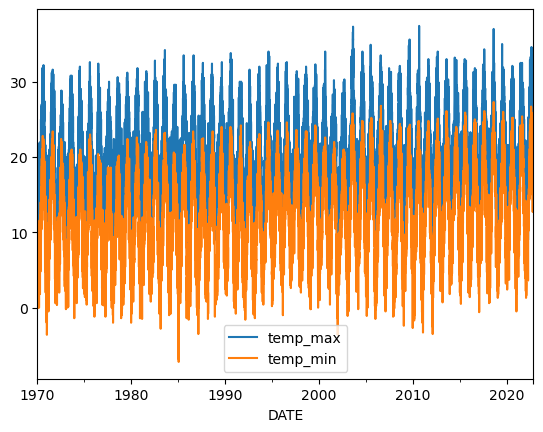

In [28]:
# Plotting the temperature data, temperatures seems fine apart from few outlier values.
barcelona_weather[['temp_max','temp_min']].plot()

<AxesSubplot:xlabel='DATE'>

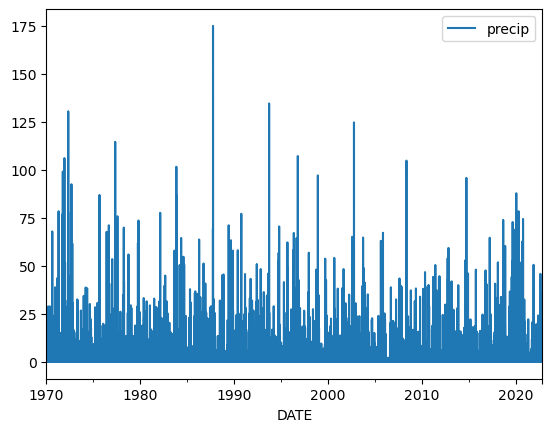

In [29]:
# Plotting the weather data, seems good apart from a couple of outlier values.
barcelona_weather[['precip']].plot()

In [30]:
# Checking total yearly precipitation values to see if there is something odd
barcelona_weather.groupby(barcelona_weather.index.year).sum()['precip']

DATE
1970     473.2
1971    1171.7
1972    1057.7
1973     413.9
1974     403.8
1975     625.6
1976     663.8
1977     740.7
1978     524.6
1979     755.7
1980     432.9
1981     428.5
1982     702.2
1983     757.3
1984     699.2
1985     511.7
1986     571.2
1987     984.8
1988     426.0
1989     573.2
1990     684.2
1991     628.0
1992     534.7
1993     695.8
1994     561.4
1995     536.1
1996    1025.5
1997     456.8
1998     501.7
1999     385.2
2000     404.6
2001     474.9
2002     773.3
2003     651.6
2004     507.5
2005     581.0
2006     361.6
2007     534.6
2008     509.5
2009     368.1
2010     515.5
2011     700.2
2012     446.2
2013     590.4
2014     518.6
2015     323.9
2016     406.9
2017     394.5
2018     753.4
2019     672.8
2020    1012.5
2021     334.0
2022     275.6
Name: precip, dtype: float64

In [31]:
# Creating a column called target with the temp_max values of subsequent day
barcelona_weather['target'] = barcelona_weather.shift(-1)['temp_max']
# Excluding the last row since we didn't have a value to fill the target for the last day
barcelona_weather = barcelona_weather.iloc[:-1,:].copy()


In [32]:
barcelona_weather

,precip,temp_max,temp_min,target
DATE,,,,
1970-01-01,0.0,10.6,1.6,7.8
1970-01-02,0.2,7.8,1.4,6.6
1970-01-03,4.4,6.6,0.6,12.4
1970-01-04,4.7,12.4,6.0,16.4
1970-01-05,0.0,16.4,8.8,11.0
...,...,...,...,...
2022-10-26,0.0,26.3,18.0,22.7
2022-10-27,0.0,22.7,16.8,22.9
2022-10-28,0.0,22.9,15.9,22.1


### Setting up the prediction model

In [33]:
# Importing Ridge regression model scikit-learn
from sklearn.linear_model import Ridge

# Initiliazing the reg ("regression") variable
reg = Ridge(alpha=.1)

In [34]:
# Setting predictor columns
predictors = ['precip', 'temp_max', 'temp_min']

In [35]:
# Setting the train set to be until 2022 and test set to be from 2022
train = barcelona_weather.loc[:'2021-12-31']
test = barcelona_weather.loc['2022-01-01':]

In [36]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1970-01-01,0.0,10.6,1.6,7.8
1970-01-02,0.2,7.8,1.4,6.6
1970-01-03,4.4,6.6,0.6,12.4
1970-01-04,4.7,12.4,6.0,16.4
1970-01-05,0.0,16.4,8.8,11.0
...,...,...,...,...
2021-12-27,0.0,22.2,10.6,21.2
2021-12-28,0.0,21.2,14.2,20.9
2021-12-29,0.0,20.9,13.2,20.6


In [37]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2022-01-01,0.0,16.3,7.5,15.0
2022-01-02,0.0,15.0,7.8,14.7
2022-01-03,0.0,14.7,8.7,18.5
2022-01-04,13.9,18.5,9.5,14.2
2022-01-05,0.2,14.2,5.8,12.4
...,...,...,...,...
2022-10-26,0.0,26.3,18.0,22.7
2022-10-27,0.0,22.7,16.8,22.9
2022-10-28,0.0,22.9,15.9,22.1


In [38]:
# Calling the fit method on our regression model and fit it on our training dataset with our predictors and try to\
# predict our target

reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [39]:
# Generating predictions on our test dataset using the predictor columns
predictions = reg.predict(test[predictors])

In [40]:
# Using mean_absolute_error to see how well it performed
# We have a prediction error of 1.25 C on average on a given day
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['target'], predictions)

1.2553479235979035

In [41]:
# Combining our test set with predictions
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
# Above we used pandas Series method to convert numpy array to series
combined

,target,0
DATE,,
2022-01-01,15.0,16.484449
2022-01-02,14.7,15.660772
2022-01-03,18.5,15.679969
2022-01-04,14.2,18.263471
2022-01-05,12.4,14.600029
...,...,...
2022-10-26,22.7,26.046758
2022-10-27,22.9,23.254244
2022-10-28,22.1,23.165875


In [42]:
# Naming columns for clarity
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2022-01-01,15.0,16.484449
2022-01-02,14.7,15.660772
2022-01-03,18.5,15.679969
2022-01-04,14.2,18.263471
2022-01-05,12.4,14.600029
...,...,...
2022-10-26,22.7,26.046758
2022-10-27,22.9,23.254244
2022-10-28,22.1,23.165875


<AxesSubplot:xlabel='DATE'>

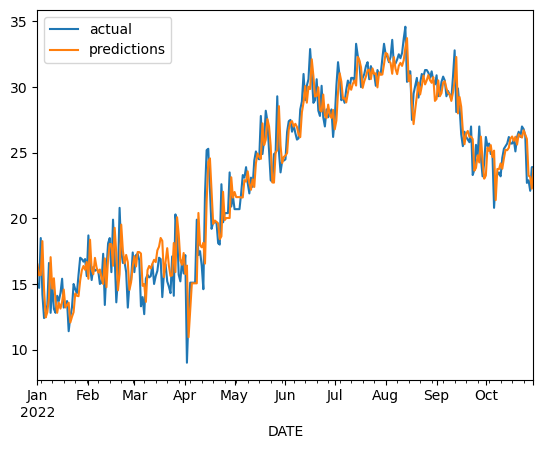

In [43]:
# Plotting to see overall performance
combined.plot()

In [44]:
# Using coef to see how precip, temp_max, temp_min.
# Precipitation having a very low negative impact on temparature makes sense as it rains less in Summer and more\
# in Autumn. temp_max having the highest coefficient makes sense too.
reg.coef_

array([-0.01774065,  0.69172972,  0.25190589])

In [45]:
# Creating a function to make predictions which returns error and the combined dataframe
def create_predictions(predictors, barcelona_weather, reg):
    train = barcelona_weather.loc[:'2021-12-31']
    test = barcelona_weather.loc['2022-01-01':]
    
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    
    error = mean_absolute_error(test['target'], predictions)
    
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    
    return error, combined

### Creating two new predictor columns that could help to improve our model

In [46]:
# month_max gives the rolling mean of temp_max 30 days before the given day
barcelona_weather['month_max'] = barcelona_weather['temp_max'].rolling(30).mean()

# We can see that first 30 values are Null as 30 days are needed to make the calculation,
barcelona_weather['month_max']



DATE
1970-01-01          NaN
1970-01-02          NaN
1970-01-03          NaN
1970-01-04          NaN
1970-01-05          NaN
                ...    
2022-10-26    25.123333
2022-10-27    25.056667
2022-10-28    24.920000
2022-10-29    24.836667
2022-10-30    24.860000
Name: month_max, Length: 19296, dtype: float64

In [47]:
# Excluding the first 30 rows to get rid of Null values

barcelona_weather = barcelona_weather.iloc[30:,:].copy()

In [48]:
# month_day_max tells how different is the temperature in a given day compared with monthly mean temperature
barcelona_weather['month_day_max'] = barcelona_weather['month_max'] / barcelona_weather['temp_max']



In [49]:
# Adding the new predictors
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max']

### Conclusion

In [50]:
error, combined = create_predictions(predictors, barcelona_weather, reg)

In [51]:
# With these new predictors the error is reduced from 1.25 to 1.18
error

1.1809545172305265

<AxesSubplot:xlabel='DATE'>

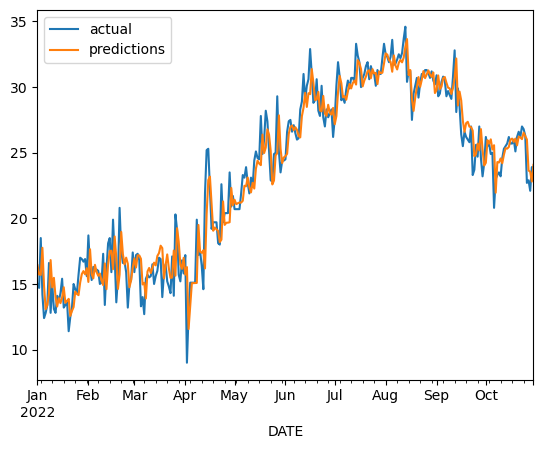

In [52]:
combined.plot()

In [53]:
# Outputting the correlation between predictors and the target column. Precipitation has very low correlation.
barcelona_weather.corr()['target']

precip          -0.057280
temp_max         0.940145
temp_min         0.906802
target           1.000000
month_max        0.886427
month_day_max   -0.293359
Name: target, dtype: float64

In [54]:
# Creating column 'diff' to see the difference between actual values and prediction values.
# Using abs() for absolute value
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [55]:
# Most erroneous predictions are from April
combined.sort_values("diff", ascending=False).head(15)

,actual,predictions,diff
DATE,,,
2022-04-02,9.0,16.286053,7.286053
2022-04-13,21.9,16.186505,5.713495
2022-02-20,20.8,15.712415,5.087585
2022-04-14,25.2,20.349633,4.850367
2022-04-08,19.9,15.079139,4.820861
2022-10-06,20.8,25.574067,4.774067
2022-03-26,20.3,15.629209,4.670791
2022-05-27,29.3,24.968019,4.331981
2022-04-23,22.6,18.375308,4.224692
